In [70]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-dekho-data/car data.csv
/kaggle/input/car-dekho-data/cardata.R


In [71]:
car=pd.read_csv("../input/car-dekho-data/car data.csv")

In [72]:
car.shape

(301, 10)

In [73]:
car.head()

,Car_Name,company,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,maruti suzuki,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,maruti suzuki,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,maruti suzuki,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,maruti suzuki,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,maruti suzuki,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [74]:
car.sample(10)

,Car_Name,company,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
185,Suzuki Access 125,other,2008,0.25,0.58,1900,Petrol,Individual,Automatic,0
155,Honda Activa 4G,honda,2017,0.48,0.51,4300,Petrol,Individual,Automatic,0
211,elantra,hyndai,2015,11.75,14.79,43535,Diesel,Dealer,Manual,0
121,Royal Enfield Thunder 350,other,2011,1.05,1.50,6900,Petrol,Individual,Manual,0
208,i20,hyndai,2017,7.90,8.10,3435,Petrol,Dealer,Manual,0
19,sx4,maruti suzuki,2010,2.65,7.98,41442,Petrol,Dealer,Manual,0
156,TVS Sport,tvs,2017,0.48,0.52,15000,Petrol,Individual,Manual,0
55,corolla altis,toyota,2009,3.60,15.04,70000,Petrol,Dealer,Automatic,0
300,brio,honda,2016,5.30,5.90,5464,Petrol,Dealer,Manual,0
264,amaze,honda,2015,4.00,7.00,40026,Petrol,Dealer,Manual,0


In [75]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   company        301 non-null    object 
 2   Year           301 non-null    int64  
 3   Selling_Price  301 non-null    float64
 4   Present_Price  301 non-null    float64
 5   Kms_Driven     301 non-null    int64  
 6   Fuel_Type      301 non-null    object 
 7   Seller_Type    301 non-null    object 
 8   Transmission   301 non-null    object 
 9   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 23.6+ KB


In [76]:
car.drop(columns="Car_Name",inplace=True)

In [77]:
car.drop(columns="company",inplace=True)

In [78]:
car.isnull().sum()

Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [79]:
car.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


<AxesSubplot:>

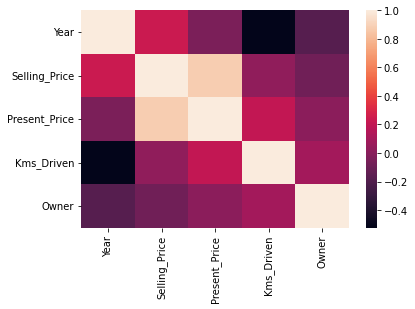

In [80]:
import seaborn as sns
sns.heatmap(car.corr())

In [81]:
car_new=car.pivot_table(values='Selling_Price',index='Owner',columns='Seller_Type')
car_new

Seller_Type,Dealer,Individual
Owner,,
0,6.771623,0.883535
1,4.337500,0.391667
3,NaN,2.500000


<AxesSubplot:xlabel='Seller_Type', ylabel='Owner'>

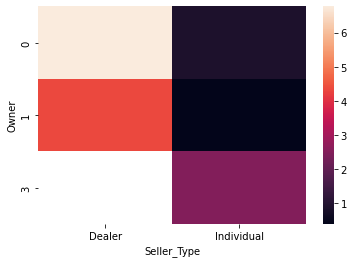

In [82]:
sns.heatmap(car_new)

In [83]:
car.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [84]:
car[car['Selling_Price']>6]

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
5,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
289,2016,10.11,13.60,10980,Petrol,Dealer,Manual,0
292,2016,6.40,8.40,12000,Petrol,Dealer,Manual,0
295,2015,8.55,13.09,60076,Diesel,Dealer,Manual,0
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0


In [85]:
car=car[car['Selling_Price']<6].reset_index(drop=True)

In [86]:
car

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
3,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
4,2017,2.85,3.60,2135,Petrol,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
218,2010,3.25,9.90,38000,Petrol,Dealer,Manual,0
219,2014,3.75,6.80,33019,Petrol,Dealer,Manual,0
220,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
221,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0


In [87]:
car['Fuel_Type'].value_counts()

Petrol    201
Diesel     20
CNG         2
Name: Fuel_Type, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Kms_Driven', ylabel='Selling_Price'>

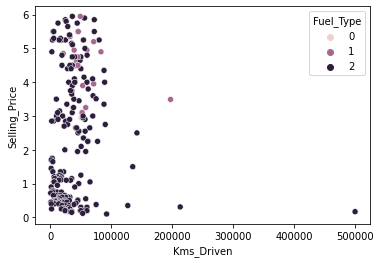

In [88]:
sns.scatterplot(X['Kms_Driven'],Y,hue=X['Fuel_Type'])

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.compose import make_column_transformer

In [90]:
ohe=OneHotEncoder()
ohe.fit(X[['Fuel_Type','Seller_Type','Transmission','Owner']])
col_transform=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','fuel','seller_type','transmission','owner']),remainder='passthrough')

In [91]:
labelencoder=LabelEncoder()

In [92]:
fueltype = labelencoder.fit_transform(car['Fuel_Type'])
Selltype = labelencoder.fit_transform(car['Seller_Type'])
trans = labelencoder.fit_transform(car['Transmission'])

In [93]:
car['Fuel_Type']=fueltype
car['Seller_Type'] = Selltype
car['Transmission']=trans

In [94]:
X=car.drop(columns="Selling_Price",axis=1)
Y=car['Selling_Price']

In [95]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           223 non-null    int64  
 1   Selling_Price  223 non-null    float64
 2   Present_Price  223 non-null    float64
 3   Kms_Driven     223 non-null    int64  
 4   Fuel_Type      223 non-null    int64  
 5   Seller_Type    223 non-null    int64  
 6   Transmission   223 non-null    int64  
 7   Owner          223 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 14.1 KB


## Linear Regressor

In [96]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)
lr=LinearRegression()
lr.fit(X_train,Y_train)
y_pred=lr.predict(X_test)

In [97]:
y_pred

array([ 4.31805943,  3.50940668,  1.06966998,  1.32597677,  0.73539447,
        1.21991021,  1.05636365,  1.3830963 ,  1.21202995,  0.41589497,
        4.0263126 ,  3.09327114,  0.89199085,  3.90780628,  1.16490488,
        4.03537421,  3.70258934,  0.54587086,  3.98821325,  0.62362055,
        4.55061246,  3.96536485,  3.44498439,  0.83458469,  0.51038515,
        3.12138897,  2.38108677,  1.32367819,  4.240041  ,  4.42276333,
        1.23386365,  3.85301035,  4.10959008,  3.15302677,  4.1738025 ,
        0.98606017,  0.50470879,  3.7963197 ,  1.377069  , -0.27312953,
        4.08295944,  0.68672151,  3.24775912,  4.48932064,  1.16467535])

In [98]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE

print('Mean Absolute Error:', round(metrics.mean_absolute_error(Y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(Y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(Y_test, y_pred)),2))

Mean Absolute Error: 0.54
Mean Squared Error: 0.52
Root Mean Squared Error: 0.72


## Random Forest Regressor


In [99]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, Y_train)


Y_pred = regressor.predict(X_test)

In [100]:
Y_pred

array([4.685 , 2.79  , 1.266 , 1.112 , 1.2175, 0.81  , 0.5225, 1.4875,
       1.1775, 0.506 , 4.055 , 2.3425, 0.501 , 2.955 , 0.479 , 4.2225,
       3.444 , 1.205 , 4.0975, 0.838 , 5.275 , 5.13  , 2.91  , 0.438 ,
       0.368 , 2.54  , 2.245 , 1.418 , 4.6855, 5.3175, 0.798 , 4.0875,
       4.9125, 3.283 , 5.25  , 0.446 , 0.2505, 4.175 , 1.5475, 0.209 ,
       2.7225, 0.4065, 2.185 , 5.0375, 1.1625])

In [101]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE

print('Mean Absolute Error:', round(metrics.mean_absolute_error(Y_test, Y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(Y_test, Y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)),2))

Mean Absolute Error: 0.32
Mean Squared Error: 0.27
Root Mean Squared Error: 0.52
